In [1]:
import apogee.modelspec.turbospec
from apogee.modelatm import atlas9
import apogee.spec.plot as splot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# The effect of inconsistencies between model atmospheres and spectral synthesis

We use a cool model

In [2]:
atm= atlas9.Atlas9Atmosphere(teff=3500.,logg=2.5,metals=0.,am=0.,cm=0.)

In [4]:
synspec_correct= apogee.modelspec.turbospec.synth(modelatm=atm,
                                                 linelist='20150714',
                                                 lsf='all',cont='true',vmacro=0.,
                                                 isotopes='arcturus')

Now we use a model atmosphere with a lower alpha enhancement

In [5]:
atm2= atlas9.Atlas9Atmosphere(teff=3500.,logg=2.5,metals=0.,am=-0.25,cm=0.)

In [16]:
synspec_minus= apogee.modelspec.turbospec.synth([8.,0.25],[12,0.25],[14.,0.25],[16.,0.25],[20.,0.25],[22.,0.25],
                                                modelatm=atm2,
                                                linelist='20150714',
                                                lsf='all',cont='true',vmacro=0.,
                                                isotopes='arcturus')

And a model atmosphere with a higher alpha enhancement

In [8]:
atm3= atlas9.Atlas9Atmosphere(teff=3500.,logg=2.5,metals=0.,am=+0.25,cm=0.)

In [17]:
synspec_plus= apogee.modelspec.turbospec.synth([8.,-0.25],[12,-0.25],[14.,-0.25],[16.,-0.25],[20.,-0.25],[22.,-0.25],
                                                modelatm=atm3,
                                                linelist='20150714',
                                                lsf='all',cont='true',vmacro=0.,
                                                isotopes='arcturus')

Compare

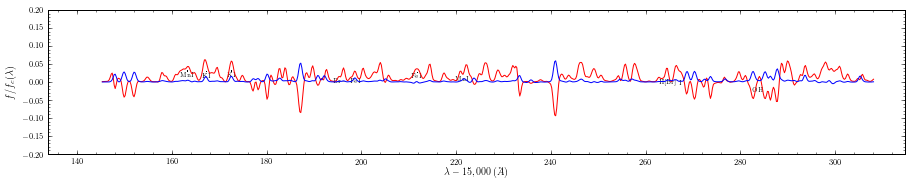

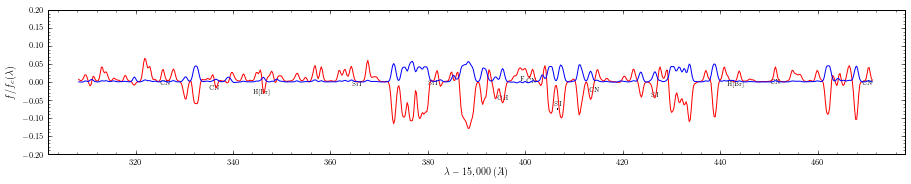

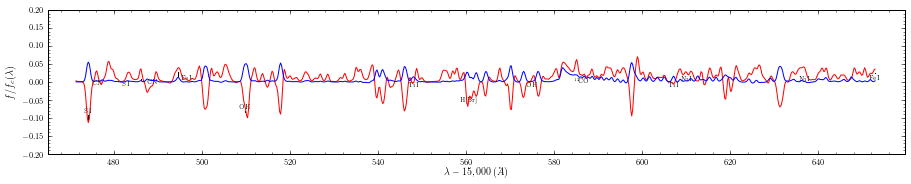

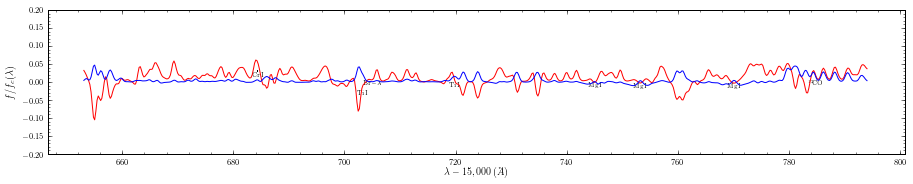

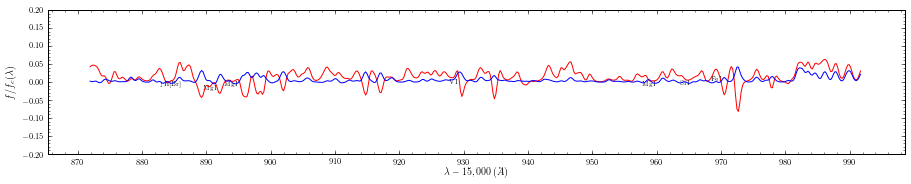

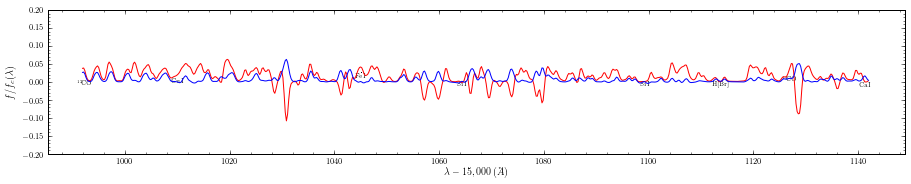

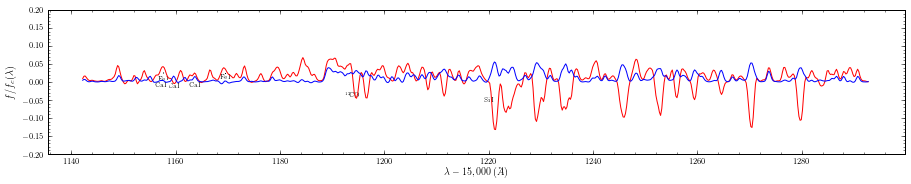

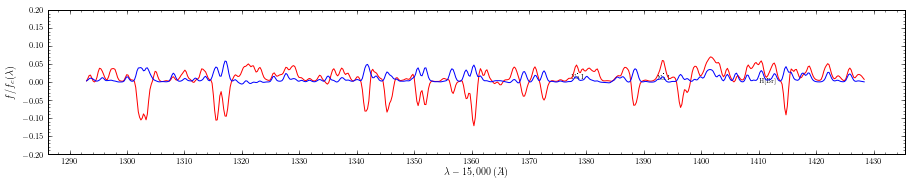

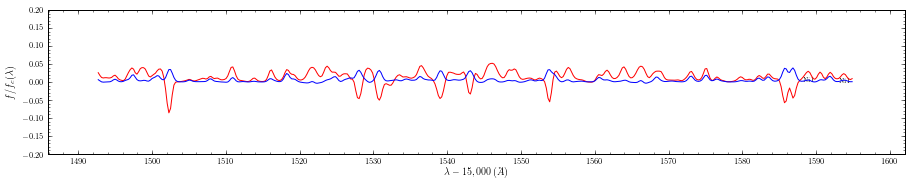

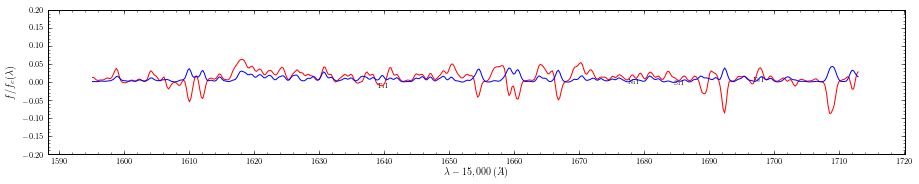

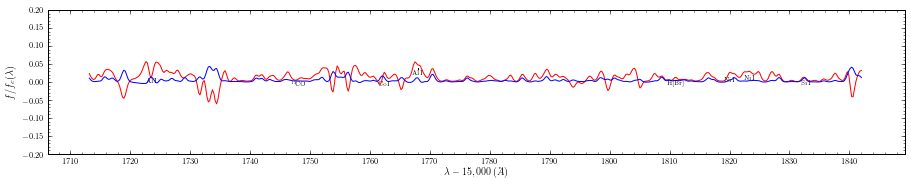

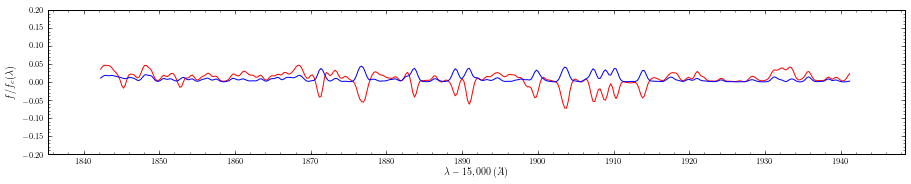

In [18]:
for panel in apogee.spec.plot.highres(synspec_minus[0]-synspec_correct[0],synspec_plus[0]-synspec_correct[0],
                                      yrange=[-0.2,0.2],color=['r','b'],labelLines=True,cleanZero=False,fig_width=14.):
    show()